# Lab 12

This week, we are going to focus on the process of supervised learning. Specifically, our goals today are:

0. Understand the role of each phase
1. Compare and contrast training vs. testing
2. Discuss how to select training and testing data



### Imports for Today

Let us import the packages that we need for today and the dataset from last time.

In [1]:
## Import block
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns; sns.set()

import numpy as np
from numpy import linalg as LA
import pandas as pd

from sklearn import linear_model

In [2]:
## Functions for later use

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="lightblue")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def place_parameter(p_vec, col, ax=None):
    plt.scatter(p_vec[0],p_vec[1], c=col, marker = "*", s = 100)
    
def draw_parameter_path(p0,p1, col, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color=col)
    ax.annotate('', p1, p0, arrowprops=arrowprops)   
    
def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)
    
def compute_m_partial(in_vals, truth_vec, predict_vec):
    return -2*np.mean(in_vals*(truth_vec-predict_vec))

def compute_b_partial(truth_vec, predict_vec):
    return -2*np.mean(truth_vec-predict_vec)

def adjust_L(current_L, grad_step_num):
    pass

In [3]:
## Import Data

employ_data = pd.read_csv("../Lab09/lab9data.csv", sep = ",")

## numpy vectors of our inputs
neuro = employ_data[["neuroticism"]].to_numpy()
perform = employ_data[["performance"]].to_numpy()

In [ ]:
# For function testing 




### Supervised Learning - Where are we? 

So far our journey with supervised learning, we've seen the process of _training_ our algorithms and _testing_ our trained algorithms. We've discussed the differences between parameters and hyperparameters, and how to use gradient descent to set parameters. 

In all our discussions, we have carefully side-stepped the _**why**_ behind the two phases in supervised learning. Today aims to confront these _whys_ directly.

## Machine learning - Broad Goal

The goal of any machine learning algorithm is to uncover some underlying truth about our data. For example, consider our student information dataset. We might want to know does average amount of sleep relate or impact one's GPA? To answer this question, we have (fake) data from a number of students that are individual glimpses into the **true** relationship between average amount of sleep and a person's GPA. In an imperfect metaphor, just as a doctor can witness a person's symptoms for an unknown illness, we can view the data that we have as the "symptoms" for the true relationship that we cannot see. 

Our broad goal in machine learning is to find the _true relationship_ for our data based on the data that we have. The idea is that if we find the true relationship, then we can accurately predict, classify, and cluster any new data (or symptoms or examples) that we are given. 

The process of supervised learning divides this goal into the two pieces. First the train phase works to find something close to the true relationship and the test phase 

## Coding Session 1 

At its core, **gradient descent** is a series of steps dictated by the _gradient_ _descending_ an evaluation surface. 

In the below code block, create an iterative process that creates lists of $m$ values, $b$ values, and the MSE associated to it. We should be able to state the number of steps `n_steps` and decend that number of times. 

In [7]:
# Coding session 1
#initialize
mnew = 0
bnew = 0
numberofsteps = 5000

#set L
L = 0.01


outm = []
outb = []
outmse = []

for vecti in range(numberofsteps):
    m = mnew
    b = bnew
    
    #computing the gradient
    preds = m*neuro + b
    d_m = compute_m_partial(neuro, perform, preds)
    d_b = compute_b_partial(perform, preds)
    #find error 
    errormse = compute_mse(perform, preds)
    
    # put in output list
    outm.append(m)
    outb.append(b)
    outmse.append(errormse)
    
    #update
    mnew = m - (L*d_m)
    bnew = b - (L*d_b)
    

In [9]:
len(outm), len(outb), len(outmse)

(5000, 5000, 5000)

Similarly to the submission for Lab 10, plot your path with the parameters selected by the `sklearn` implementation of linear regression. 

Text(0.5, 1.0, 'Parameter Vector space')

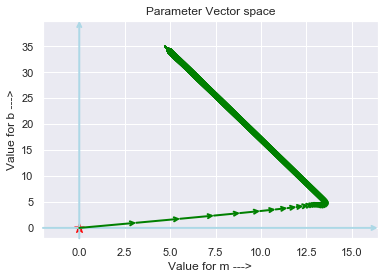

In [13]:
# Plot your results here
# plotting block for you 

fig = plt.figure()

# Set axis limits
xmin = -2
xmax = max(outm) + 3
ymin = -2
ymax = max(outb) + 5

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

# plot vectors
for vecti in range(numberofsteps - 1):
    draw_parameter_path([outm[vecti], outb[vecti]],[outm[vecti+1], outb[vecti+1]],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

### Coding session 1 - Reflection 1

Try a few values for `n_steps`, say up to 5000. Plot the resulting paths again in comparison to the parameters selected by the `sklearn` implementation of linear regression. 

What surprises you? What ideas/questions/concerns do you have? 

In [18]:
# Block for exploration 

# Coding session 2
#initialize
mnew = 0
bnew = 0
numberofsteps = 200

#set L
L = 0.00001


outm = []
outb = []
outmse = []

for vecti in range(numberofsteps):
    m = mnew
    b = bnew
    
    #computing the gradient
    preds = m*neuro + b
    d_m = compute_m_partial(neuro, perform, preds)
    d_b = compute_b_partial(perform, preds)
    #find error 
    errormse = compute_mse(perform, preds)
    
    # put in output list
    outm.append(m)
    outb.append(b)
    outmse.append(errormse)
    
    #update
    mnew = m - (L*d_m)
    bnew = b - (L*d_b)
    

Text(0.5, 1.0, 'Parameter Vector space')

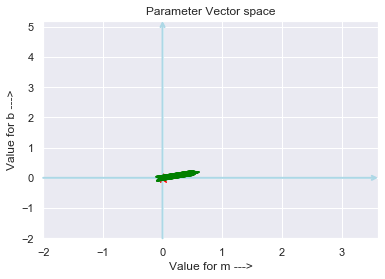

In [19]:
# Block for additional exploration 

# Plot your results here
# plotting block for you 

fig = plt.figure()

# Set axis limits
xmin = -2
xmax = max(outm) + 3
ymin = -2
ymax = max(outb) + 5

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

# plot vectors
for vecti in range(numberofsteps - 1):
    draw_parameter_path([outm[vecti], outb[vecti]],[outm[vecti+1], outb[vecti+1]],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

In [20]:
# Block for more exploration 

# Block for exploration 

# Coding session 2
#initialize
mnew = 0
bnew = 0
numberofsteps = 200

#set L
L = 1


outm = []
outb = []
outmse = []

for vecti in range(numberofsteps):
    m = mnew
    b = bnew
    
    #computing the gradient
    preds = m*neuro + b
    d_m = compute_m_partial(neuro, perform, preds)
    d_b = compute_b_partial(perform, preds)
    #find error 
    errormse = compute_mse(perform, preds)
    
    # put in output list
    outm.append(m)
    outb.append(b)
    outmse.append(errormse)
    
    #update
    mnew = m - (L*d_m)
    bnew = b - (L*d_b)
    

/anaconda3/envs/csc294/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square


Text(0.5, 1.0, 'Parameter Vector space')

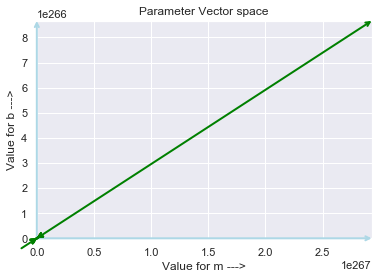

In [21]:
# Block for testing an idea (or two) for Gradient Descent

# Block for additional exploration 

# Plot your results here
# plotting block for you 

fig = plt.figure()

# Set axis limits
xmin = -2
xmax = max(outm) + 3
ymin = -2
ymax = max(outb) + 5

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

# plot vectors
for vecti in range(numberofsteps - 1):
    draw_parameter_path([outm[vecti], outb[vecti]],[outm[vecti+1], outb[vecti+1]],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

### Brainstorming session 1

What do we notice? Let's try to come up with at least 5 ideas/questions:
* Go in one direction for a bit and then we switch directions
    * The turn does not happen within 10 steps
    * The turn does happen within 200 steps
* Steps get smaller as we go
* We eventually get to the star
    * We don't quite get there in 200 steps
* What happens if we pass the ideal number of steps? Do we overshoot?


### Coding session 1 - Reflection 2

Fix the value for `n_steps` to 200. This time vary the value for L from 0.0001 to 1. Plot the resulting paths again in comparison to the parameters selected by the `sklearn` implementation of linear regression. 

What surprises you? What ideas/questions/concerns do you have? 

In [ ]:
# Block for exploration 

In [ ]:
# Block for additional exploration 

In [ ]:
# Block for more exploration 

In [ ]:
# Block for testing an idea (or two) for Gradient Descent

### Brainstorming session 2

What do we notice? Let's try to come up with at least 5 ideas/questions:
* 
* 
* 
* 
* 

## Considerations in Gradient Descent

We have two big considerations in gradient descent: 1) the size of the step that we are taking, and 2) the number of steps that we are taking.

The first is governed in part by the **learning rate** which we have denoted as $L$. The learning rate effectively controls how much of an effect the gradient has on the parameter update. The second -- like the number of iterations within $k$-means -- is a bit more subtle, requiring an examination of **stopping conditions.** 

### Learning Rate + Step Size

There are many ways to approach the learning rate and step size: 

0. Enforce a consistent step size by shrinking the gradient vector to be of length one and keeping a consistent learning rate.
1. We could take an adaptative approach that is related to how many steps the algorithm has taken. That is, gradient descent could take bigger steps at the beginning of the path and then take increasingly smaller ones as it moves on. 

While easy to state the intuition of this second option, there are many ways that one could do this:
* Decrease the value of $L$ with each step of the gradient descent either linearly or exponetially
* Decrease the value of $L$ in a stepwise fashion every few steps 

Check out [this page](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1) for a few ideas. 

Choose one of these approaches to the learning rate and sketch out how you would like to code this. Then let's form two groups to implement an approach as the helper function `adjust_L` in the function block. 

#### Adjusting $L$ in Gradient Descent

Copy your current version of your gradient descent below and add your adjusting learning rate. 

Apply this implementation to our employee information. Then chart the path your gradient descent took and again compare it to the parameter values found by the `sklearn` implementation of linear regression. 

In [ ]:
# Scratch block

In [ ]:
# Gradient Descent with varying L


In [ ]:
# Your plot of the path given by Gradient Descent 
#                      with varying learning rate

### Number of steps (or GD Stopping conditions)

Gradient descent at its core is a series of steps, but we have to say when we've taken enough steps. There are two considerations when determining that number. From a computational point of view, we also want to limit the maximum number of steps. However, we want to take enough steps that we reach the minimum, but not so many that we by-pass that minimum. 

In terms of testing to see if we have reached the minimum, let us recall a bit of calculus. Consider a one-dimensional curve, ie. one that you can draw on paper with your pencil. Draw $x$ and $y$ axes for reference. 

Now find a minima, and lay your pencil down such that the side of the pencil (ie. neither "end" of the pencil) touches the curve in one place. Notice that your pencil is parallel to the $x$ axis, or as we say, it's _flat._ Your pencil is a physical representative of the derivative. If we were to do something similar for an evaluation surface, we would use a board in place of the pencil. In this higher dimensional version, the board will be parallel to the parameter plane. 

When the derivative flattens, the rate of changes are close to 0. So encoding this arrival at a "minima" is equivalent to checking the size of the gradient, or checking to see when the length of the gradient is close to zero. 

We balance these consideration with two stopping conditions:
1. We can set a hard limit on how many steps we want to take
2. When the (length of the) gradient becomes small enough   

These stopping conditions feel very similar to those we encountered for $k$-means, in that the first limits the number of iterations and the second does a quick examination of the most recent progress that the algorithm has made. 

We will add these stopping conditions in two phases, checking the paths against the parameter values found by the `sklearn` implementation of linear regression. 

**_Note:_** To compute the length of a vector, you can either use:
* `norm` within the linear algebra submodule (`linalg`) of `numpy`
* The fact that $|\nabla f| = \sqrt{\nabla f \cdot \nabla f}$

In [ ]:
# Adding a hard limit (ie. the max number of steps)

In [ ]:
# Your plot of the path given by Gradient Descent with a maximum number of steps

In [ ]:
# Adding a stopping condition based on the length of the gradient 

In [ ]:
# Your plot of the path given by Gradient Descent with:
#        1. a maximum number of steps AND
#        2. length of the gradient 

## Gradient descent

Let us put all these pieces Implement gradient descent with two stopping conditions and an option to vary the learning rate (or not!). 

Apply your implementation to our employee information. Then chart the path your gradient descent algorithm took and again compare it to the parameter values found by the `sklearn` implementation of linear regression. 

In [ ]:
# Scratch block

In [ ]:
# Your implementation of Gradient Descent


In [ ]:
# Your plot of the path given by Gradient Descent

## Different flavors of Gradient Descent

Last time we talked about the number of MSE computations for grid search. Clearly gradient descent lowers the number of MSE computations, but within each MSE computation, there are also a number of computations dictated by the size of the dataset. 

Our dataset has 300? employees. For each computation of MSE for our example, how many arithmatic operations occur? Think about the _order_ of operations as you do this. Try to express your number in terms of $n_o$ the number of observations, $n_v$ the number of variables, and/or the $n_p$ the number of parameters.  

When you have a number, consult with one person who is not currently sitting next to you. 

### Stochastic Gradient Descent 

Stochastic Gradient Descent attempts to overcome the number of computations within the MSE by using just one randomly chosen datapoint for each step of the gradient descent. The gradient descent that we implemented earlier is also called _batch gradient descent_ because it consults a _batch_ of data, instead of just one datapoint, in the decision of where to step. 

Create an implementation of stochastic gradient descent, where for each step, you randomly select a datapoint to act in place of the dataset. Before you get started, a few hints and warnings:
* You might want to start with copying your code from above
* Be careful to not overwrite the dataset when you select your random point

Apply your implementation to our employee information. Then chart the path your stochastic gradient descent took in one color and the path your batch gradient descent took in a second color. Compare both paths to the parameter values found by the `sklearn` implementation of linear regression. 

In [ ]:
# Scratch Block

In [ ]:
# Your implementation of Stochastic Gradient Descent


In [ ]:
# Your plot of the paths given by Stochastic and Batch Gradient Descents

#### Bonus

You may want to use EEEE and FFFF to see how long each implementation takes in terms of TIME THING. 


In [ ]:
# Code block for time checks


### Mini-Batch Gradient Descent

Mini-Batch Gradient Descent is the compromise between batch and stochastic gradient descent using small collections of the data in each step, instead of using all of the data or using just one data point. 

### Next week

A deeper look at the training and testing phases. 

### Final Thoughts

To finish up this lab, Create a plot with both your stochastic and batch gradient descent paths compared to the best values of $m$ and $b$ according to the linear regression from `sklearn`. Share your plot in a post on **#lab_submission** channel on slack and note which path seems better to you. Your post must start with **Lab11** to get credit. 

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab11**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources consulted 

0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. [BATCH GRADIENT DESCENT VS STOCHASTIC GRADIENT DESCENT](https://www.bogotobogo.com/python/scikit-learn/scikit-learn_batch-gradient-descent-versus-stochastic-gradient-descent.php)
2. [Gradient descent algorithms and adaptive learning rate adjustment methods](https://towardsdatascience.com/gradient-descent-algorithms-and-adaptive-learning-rate-adjustment-methods-79c701b086be)
3. [Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)
4. [Stochastic Gradient Descent on Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
5. [Gradient Descent Lecture notes by Ryan Tibshirani](https://www.stat.cmu.edu/~ryantibs/convexopt/lectures/grad-descent.pdf)
6. [norm helpfile in numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.norm.html)
6. [Notation for grad](https://tex.stackexchange.com/questions/219951/laplaces-equation-symbol)